In [294]:
import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms
import random
from torch.utils.data import DataLoader
import matplotlib
import gdown
import scipy
import ipykernel

In [6]:
celebA_path = "/home/tomi64/projects/melytanulas_project/celebA"
Flowers102_path = "/home/tomi64/projects/melytanulas_project/Flower102"


celebA = torchvision.datasets.CelebA(root = celebA_path, download=True)
Flowers102 = torchvision.datasets.Flowers102(root = Flowers102_path, download=True)

Files already downloaded and verified


In [20]:
IMAGE_SIZE=112

In [254]:
class DataWithNoise(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, timesteps):
        self.dataset = dataset
        self.transforms = transforms
        self.timesteps = timesteps
        self.beta_schedule = torch.linspace(1e-4, 2e-2, timesteps)
        self.alpha_schedule = torch.cumprod(1-self.beta_schedule, dim=0)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        image, _ = self.dataset[idx]

        image = self.transforms(image)
        
        noise = torch.randn_like(image)
        t = random.randint(0, self.timesteps-1)
        noisy_image = torch.sqrt(self.alpha_schedule[t])*image+(1-self.alpha_schedule[t])*noise
        return noisy_image, noise, t


In [282]:
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*2-1)
])
Flowers102_with_noise = DataWithNoise(Flowers102, transform, 500)
celeba_with_noise = DataWithNoise(celebA, transform, 500)

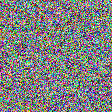

In [283]:
back_transforms = transforms.Compose([
    transforms.Lambda(lambda x: (x+1)/2),
    transforms.ToPILImage(),
])
n_image = Flowers102_with_noise[0]
back_transforms(n_image[0])

In [284]:
dataloader_celebA = DataLoader(celeba_with_noise, batch_size=32, shuffle=True)
dataloader_Flower102 = DataLoader(Flowers102_with_noise, batch_size=32, shuffle=True)

In [295]:
print(torch.__version__)
print(matplotlib.__version__)
print(gdown.__version__)
print(torchvision.__version__)
print(scipy.__version__)
print(ipykernel.__version__)

2.4.1+cu121
3.9.2
5.2.0
0.19.1+cu121
1.14.1
6.29.5
